![banner](img/cdips_2017_logo.png)

## Introduction

This notebook serves as an introduction to the soil properties dataset
and presents the top-line results for all of our models.

Links to the other notebooks in this repo are included throughout.

We'd like to thank the
[Africa Soil Information Service](http://africasoils.net/)
for collecting and cleaning the data,
[Kaggle](kaggle.com/c/afsis-soil-properties)
for hosting the data,
and the
[UC Berkeley Career Development Initiative in the Physical Sciences](CDIPS.physics.berkeley.edu)
for running the
[Data Science Workshop](CDIPS.physics.berkeley.edu/2017-cdips-data-science-workshop/)
for which these materials were originally prepared.

## Software Tools

To make this repo broadly relevant,
we used a technology stack that is,
as of Summer 2017,
representative of the stacks used for data science
in Python.

A brief description of the tools appears below,
along with links to educational materials.
For a general overview of tools used to perform
data science in Python,
check out
[this GitHub repo](https://github.com/donnemartin/data-science-ipython-notebooks).

#### pandas
[pandas](http://pandas.pydata.org/)
is a data management and analysis library that provides easy-to-use, performant data tables. Brandon Rhodes'
[2015 PyCon tutorial](https://github.com/brandon-rhodes/pycon-pandas-tutorial)
is a great, principled introduction to pandas "from the ground up".

#### numpy
[numpy](http://www.numpy.org/)
is a highly performant array-manipulation library.
Justin Johnson's
[tutorial](http://cs231n.github.io/python-numpy-tutorial/)
is an excellent resource for folks with a moderate amount of
prior programming experience,
while the
[numpy for MATLAB users](https://docs.scipy.org/doc/numpy-dev/user/numpy-for-matlab-users.html)
page of the numpy documentation is useful for folks
coming from that language.

#### scikit-learn
[scikit-learn](http://scikit-learn.org/stable/)
is a machine learning and data analysis library
that implements most popular models and various forms
of cross-validation and data pipelining.
[The documentation](http://scikit-learn.org/stable/documentation.html)
is excellent and includes a number of great tutorials
on data science methods.
scikit-learn works well with both pandas and numpy.

#### matplotlib + seaborn
[matplotlib](http://matplotlib.org/)
is a highly flexible plotting library
based on MATLAB's plotting functionality.
In part because of its flexibility,
it can be somewhat tough to get used to.
[seaborn](seaborn.pydata.org)
is a more specialized plotting library
for statistical data visualization
built on top of matplotlib,
and has
[excellent documentation](http://seaborn.pydata.org/tutorial.html).

#### Jupyter notebooks
This document is a
[Jupyter notebook](http://jupyter-notebook.readthedocs.io/en/stable/).
Jupyter notebooks allow the seamless
integration of text, media, and interactive code blocks.
Though notebooks can be used with almost
[any language](https://github.com/jupyter/jupyter/wiki/Jupyter-kernels),
they are particularly popular in the Python community,
especially for educational and research-communication purposes.

#### binder
[binder](http://docs.mybinder.org/)
is a tool for easily producing reproducible,
interactive
executable environments
by combining
[Docker](https://www.docker.com/)
with
[Jupyter Hub](https://jupyterhub.readthedocs.io/en/latest/).
This repository is hosted on a binder instance
maintained by
[HHMI Janelia](https://www.janelia.org/),
which provides free compute for educational and scientific purposes.

In [21]:
import numpy as np
import pandas as pd
import sklearn

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale=2)

%run notebooks/scripts/load_data.py
%run notebooks/scripts/comparison.py
%matplotlib inline

In [2]:
import sklearn.decomposition

import sklearn.linear_model
import sklearn.neural_network
import sklearn.svm
import sklearn.ensemble

## Data Visualization

In [3]:
X, y = load_training_spectra('./data/training.csv')

Add data visualizations here.

See more visualizations of the data in
[this notebook](link).

## Data Pre-Processing

Absorption was measured at over 3,000 wavelengths,
resuling in very rich data vectors.
This richness comes at a price.

Though we have 3,000 dimensional inputs,
we have only 1,000 data vectors.
For some models, like
[linear regression](link)
this will lead to
*over-fitting* -
a model that predicts
soil properties for previously-seen samples
extremely well,
but fails to predict soil properties accurately
for samples it has never seen before.

For other models, like
[random forest regression](link),
having many individually uninformative input dimensions
reduces performance.

And for all models, but especially
[support vector methods](link)
and
[neural networks](link),
more input dimensions
means more time spent training.

We could resolve this by smoothing and down-sampling,
but many of the spectra contain sharp,
precisely-located peaks
that we'd rather not smooth over.

Instead, we use
[Principal Components Analysis](link),
or PCA,
to reduce the size of our data vectors
while trying to retain as much information as possible.

In [4]:
PCA_transform = sklearn.decomposition.PCA(n_components=100)

## Models

#### Linear Regression

Text goes here.

In [5]:
linear_model = sklearn.linear_model.LinearRegression()

#### Neural Network

The resurgence of
[neural networks](link)
is one of the most exciting new developments
in machine learning in the past decade,
finding applications as diverse as
[beating human beings at Go](https://www.blog.google/topics/machine-learning/what-we-learned-in-seoul-with-alphago/),
[creating visual art](https://deepart.io/),
and
[operating autonomous vehicles](https://blogs.nvidia.com/blog/2016/05/06/self-driving-cars-3/).

Neural networks perform best in situations
with large datasets of very rich, structured data vectors
composed of many individually-uninformative dimensions.
However, we were still able to get decent performance
on this smaller dataset by
[carefully tuning hyperparameters](link).

In [6]:
neural_network = sklearn.neural_network.MLPRegressor(activation = 'relu',
                                                     alpha = 0.0001,
                                                     batch_size = 16,
                                                     beta_1 = 0.9,
                                                     beta_2= 0.99,
                                                     early_stopping = False,
                                                     hidden_layer_sizes = 100,
                                                     learning_rate_init = 0.0001,
                                                     max_iter = 10000,
                                                     tol = 1e-16)

#### Random Forest

Text goes here.

In [7]:
random_forest = sklearn.ensemble.RandomForestRegressor()

#### Gradient-Boosted Trees

Text goes here.

In [8]:
num_outputs = y.shape[1]

GBR_models = [sklearn.ensemble.GradientBoostingRegressor(n_estimators=5000,
                                                    max_depth=3,
                                                    min_samples_split=10,
                                                    min_samples_leaf=3,
                                                    max_features=0.8,
                                                    learning_rate=0.005)
                                              for _ in range(num_outputs)]

#### Support Vector Machine

[Support Vector Machines](link)
are a core component of the machine learning toolkit,
but they are primarily used for
classification tasks,
where the output is a label,
rather than regression tasks like this one,
where the outputs are numbers.

Additionally,
like gradient boosted trees,
support vector regression models
can only predict a single output,
rather than multiple outputs.
This meant that we had to train one model
for calcium content,
one for pH,
and so on.

Despite this handicap,
[by tuning hyperparameters](link)
we were able to get good performance
from our ensemble of support vector machines.

In [13]:
num_outputs = y.shape[1]

C = 100; epsilon=1e-1; gamma=1e-2;
SVR_models = [sklearn.svm.SVR(kernel='rbf',
                            C=C, epsilon=epsilon, gamma=gamma) for _ in range(num_outputs)]

### Model Comparison

We compare our models by running random-split
[cross-validation](link).
We get out two metrics:
the *training score*,
which tells us how well the model
can predict the soil properties
for spectra it has seen before,
and
the *test score*,
which estimates how well the model
will predict the soil properties
for novel spectra.

In [23]:
models = [linear_model, neural_network, random_forest, GBR_models, SVR_models]
model_names = ['Linear Model', 'Neural Network', 'Random Forest',
              'Gradient-Boosted Trees', 'Support Vector Machine']

num_splits = 10

In [24]:
train_scores, test_scores = compare_models(
                            models, model_names, PCA_transform,
                                X, y, num_splits=num_splits)

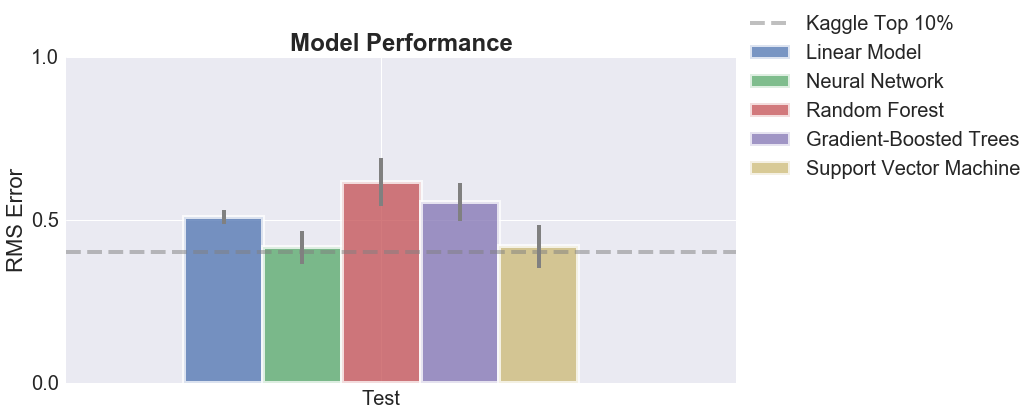

In [25]:
comparison_plot(model_names, train_scores, test_scores)

Error bars are ± standard deviation.

## Conclusions

We were able to achieve performance in the top 10% of Kaggle competitors
with two methods:
neural networks
and
support vector machines.
Considering that the winning methods
used ensembles of up to hundreds of models,
this performance is quite good.

The performance of the linear model
was actually quite good --
a linear model is capable of explaining around 70% of the variance,
occasionally out-performing the more sophisticated models.
Since linear models are far more interpretable than the other models,
it's likely that, in a business setting,
we'd opt for the simple linear model.

We were unable to get good performance from the tree-based methods --
random forests and gradient-boosted trees.
These models are better known for their good performance on classification tasks
on collections of individually-relevant features,
so perhaps this poor performance is to be expected.